<img src="https://www.mmu.edu.my/fci/wp-content/uploads/2021/01/FCI_wNEW_MMU_LOGO.png" style="height: 80px;" align=left>  

## Assignment Objective
The aim of this assignment is to guide you through the process of understanding a dataset,
performing preprocessing, building classification models, including ensemble learning techniques,
and evaluation using cross-validation and various metrics.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from apyori import apriori

#settings for seaborn plots
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(11,6)})

## Data Exploration


In [2]:
df = pd.read_csv('Student_dataset.csv')
df.head()

Marital status  Application mode  Application order  Course  \
0               1              17.0                  5   171.0   
1               1              15.0                  1  9254.0   
2               1               1.0                  5  9070.0   
3               1              17.0                  2  9773.0   
4               2              39.0                  1  8014.0   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                    19.0   
1                           160.0            1                     1.0   
2                           122.0            1                    37.0   
3                           122.0            1                    38.0   
4                           100.0            1                    37.0   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

## List of datatypes, duplicates and Null-values 

In [3]:
#understanding rows and attribute types
print('No. of records and attributes: ',df.shape)
print('List of attributes: ',df.columns)
display(df.info())

No. of records and attributes:  (4446, 37)
List of attributes:  Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Cu

None

### List of data contained Null-values

In [4]:
df2 = df
df2.isna().sum()

Marital status                                     0
Application mode                                   2
Application order                                  0
Course                                             6
Daytime/evening attendance\t                       0
Previous qualification                             0
Previous qualification (grade)                     7
Nacionality                                        0
Mother's qualification                             3
Father's qualification                             0
Mother's occupation                                0
Father's occupation                                0
Admission grade                                   18
Displaced                                          3
Educational special needs                          0
Debtor                                             2
Tuition fees up to date                            0
Gender                                             0
Scholarship holder                            

#### From the above we can observe the list of attributes that contain NaN values: 
* Application mode
* Course
* Previous qualification (grade)
* Mother's qualification
* Admission grade
* Displaced
* Debtor
* Scholarship holder 
* Age at enrollment

In [5]:
# Check for duplicate rows
duplicates = df2.duplicated().sum()

# Display rows that are duplicates
print(f"Numbers of duplicated Rows: {duplicates}")

Numbers of duplicated Rows: 22


In [6]:
after_duplicates = df2.drop_duplicates()
print(f"Numbers of duplicates after drop {after_duplicates.shape}")

Numbers of duplicates after drop (4424, 37)


### Numerical Attributes with Null-values

In [7]:
# Select numerical columns
numerical_columns = df2.select_dtypes(['int64', 'float64'])

# Find numerical columns with null values
numerical_with_nulls = numerical_columns.columns[numerical_columns.isna().any()]

# Display only numerical columns with null values
print("Numerical columns with null values:")
print(numerical_with_nulls)

Numerical columns with null values:
Index(['Application mode', 'Course', 'Previous qualification (grade)',
       'Mother's qualification', 'Admission grade', 'Displaced', 'Debtor',
       'Scholarship holder', 'Age at enrollment'],
      dtype='object')


#### Numerical attributes description/normalization

In [8]:
# Describe only the numerical columns with null values
described_null_attributes = numerical_columns[numerical_with_nulls].describe()

# Display the description
print("Description of numerical attributes with null values:")
described_null_attributes

Description of numerical attributes with null values:


Application mode       Course  Previous qualification (grade)  \
count       4444.000000  4440.000000                     4439.000000   
mean          18.663816  8858.807432                      132.640572   
std           17.490937  2060.398841                       13.221879   
min            1.000000    33.000000                       95.000000   
25%            1.000000  9085.000000                      125.000000   
50%           17.000000  9238.000000                      133.100000   
75%           39.000000  9556.000000                      140.000000   
max           57.000000  9991.000000                      190.000000   

       Mother's qualification  Admission grade    Displaced       Debtor  \
count             4443.000000      4428.000000  4443.000000  4444.000000   
mean                19.552104       126.986066     0.548728     0.113636   
std                 15.610384        14.480251     0.497676     0.317405   
min                  1.000000        95.000000     0.000000     0.000000   
25%                  2.000000       117.900000     0.000000     0.000000   
50%                 19.000000       126.100000     1.000000     0.000000   
75%                 37.000000       134.800000     1.000000     0.000000   
max                 44.000000       190.000000     1.000000     1.000000   

       Scholarship holder  Age at enrollment  
count         4444.000000        4442.000000  
mean             0.248650          23.268798  
std              0.432279           7.595064  
min              0.000000          17.000000  
25%              0.000000          19.000000  
50%              0.000000          20.000000  
75%              0.000000          25.000000  
max              1.000000          70.000000

#### Fill in Null-values with means (numerical attributes)

In [12]:
# List of numerical attributes with null values
numerical_with_nulls = [
    'Application mode', 
    'Course', 
    'Previous qualification (grade)',
    "Mother's qualification", 
    'Admission grade', 
    'Displaced', 
    'Debtor', 
    'Scholarship holder', 
    'Age at enrollment'
]

# Replace null values with the mean for the specified columns
for col in numerical_with_nulls:
    if col in df2.columns:  # Ensure the column exists in the DataFrame
         df2[col] = df2[col].fillna(df2[col].mean())

# Verify that null values are replaced
print("Null values after replacement:")
print(df2.isna().sum())  # Should show 0 for all columns


Null values after replacement:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder               

#### Categorial description 

In [10]:
#exploring categotical data
categorical_columns = df2.select_dtypes(['object']).describe()
categorical_columns

Target
count       4446
unique         3
top     Graduate
freq        2221

---
# Data Preprocessing

#### Collerration analysis

In [14]:
# Select only numeric columns for correlation
numeric_df = df2.select_dtypes(include='number')

# Compute the correlation matrix
corr = numeric_df.corr(method='pearson')

# Display the correlation matrix
corr


Marital status  \
Marital status                                        1.000000   
Application mode                                      0.264711   
Application order                                    -0.126252   
Course                                                0.046659   
Daytime/evening attendance\t                         -0.274427   
Previous qualification                                0.063742   
Previous qualification (grade)                       -0.023429   
Nacionality                                          -0.009861   
Mother's qualification                                0.193879   
Father's qualification                                0.130684   
Mother's occupation                                   0.034748   
Father's occupation                                   0.031306   
Admission grade                                      -0.005341   
Displaced                                            -0.235897   
Educational special needs                            -0.028334   
Debtor                                                0.035350   
Tuition fees up to date                              -0.090316   
Gender                                               -0.014820   
Scholarship holder                                   -0.054892   
Age at enrollment                                     0.523642   
International                                        -0.028539   
Curricular units 1st sem (credited)                   0.059927   
Curricular units 1st sem (enrolled)                   0.051672   
Curricular units 1st sem (evaluations)                0.059362   
Curricular units 1st sem (approved)                  -0.032256   
Curricular units 1st sem (grade)                     -0.059445   
Curricular units 1st sem (without evaluations)        0.034238   
Curricular units 2nd sem (credited)                   0.061421   
Curricular units 2nd sem (enrolled)                   0.038564   
Curricular units 2nd sem (evaluations)                0.023682   
Curricular units 2nd sem (approved)                  -0.044325   
Curricular units 2nd sem (grade)                     -0.071273   
Curricular units 2nd sem (without evaluations)        0.020022   
Unemployment rate                                    -0.019977   
Inflation rate                                        0.008251   
GDP                                                  -0.025820   

                                                Application mode  \
Marital status                                          0.264711   
Application mode                                        1.000000   
Application order                                      -0.286173   
Course                                                  0.062793   
Daytime/evening attendance\t                           -0.304041   
Previous qualification                                  0.423106   
Previous qualification (grade)                         -0.041266   
Nacionality                                            -0.004277   
Mother's qualification                                  0.121161   
Father's qualification                                  0.084391   
Mother's occupation                                     0.051566   
Father's occupation                                     0.036665   
Admission grade                                        -0.014251   
Displaced                                              -0.301973   
Educational special needs                              -0.030666   
Debtor                                                  0.122653   
Tuition fees up to date                                -0.135586   
Gender                                                  0.160173   
Scholarship holder                                     -0.163791   
Age at enrollment                                       0.514627   
International                                           0.001285   
Curricular units 1st sem (credited)                     0.249117   
Curricular units 1st sem (enrolled)      

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


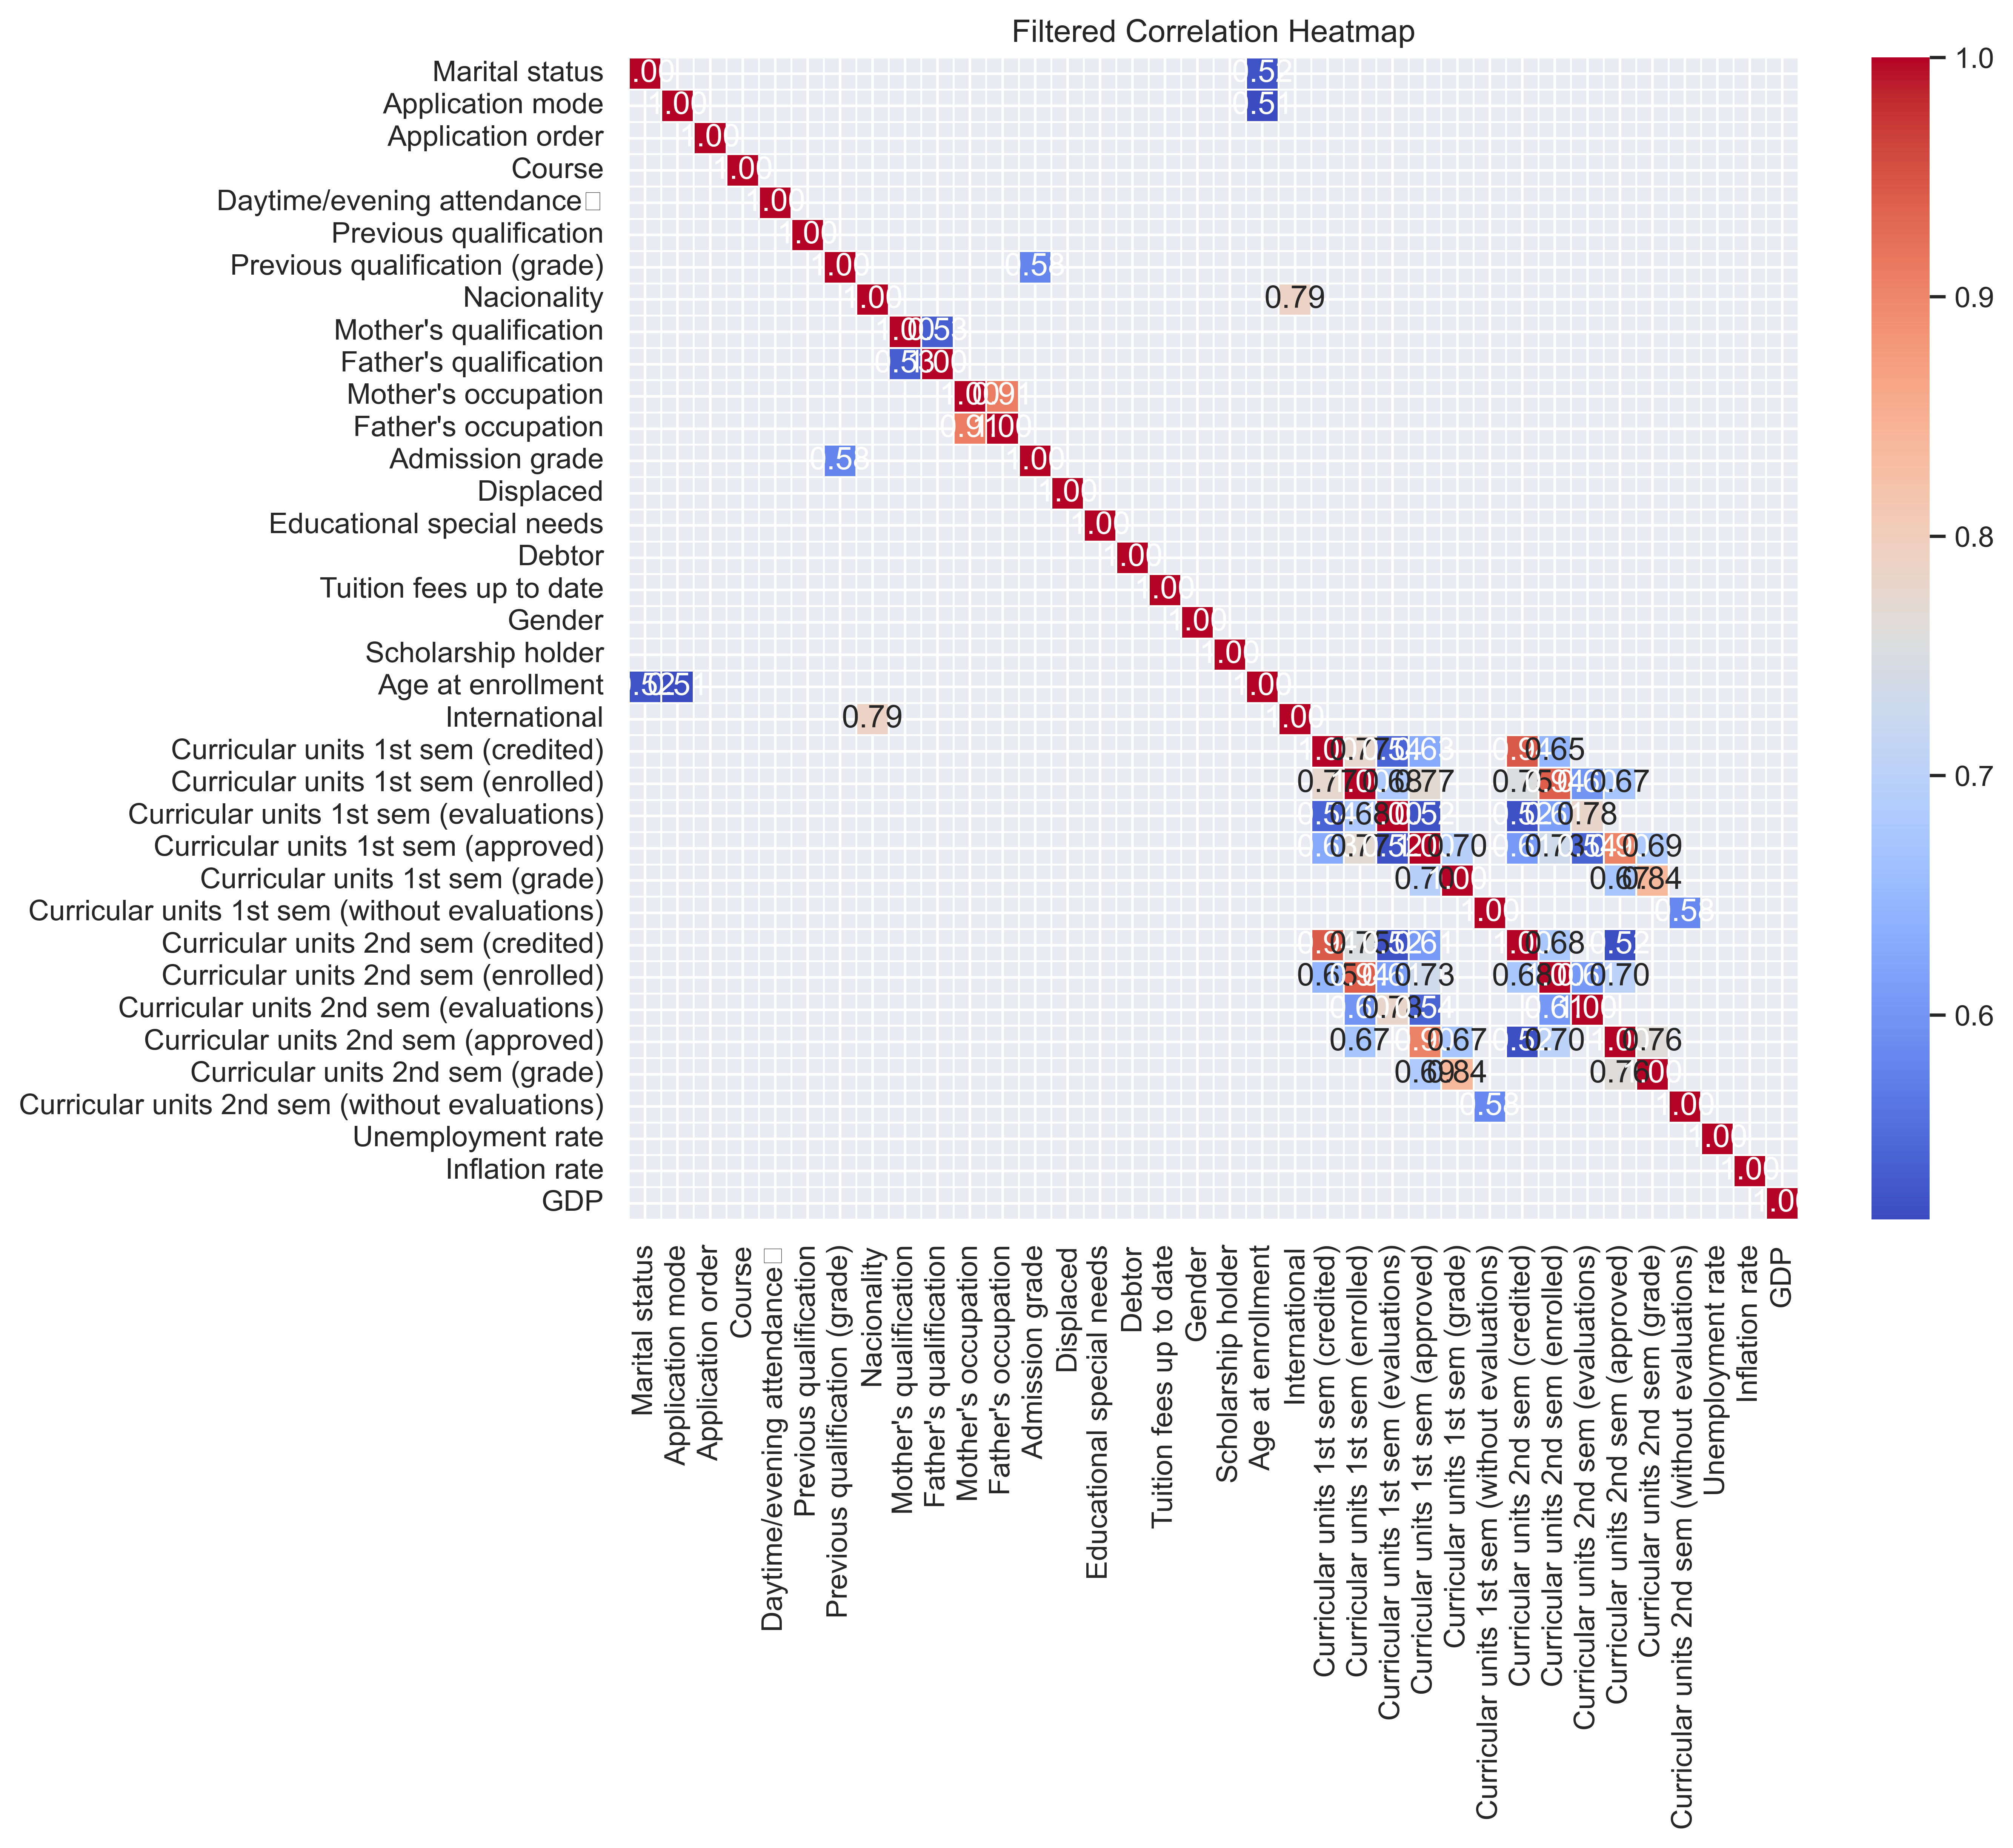

In [15]:
corr_threshold = 0.5
filtered_corr = corr[(corr > corr_threshold) | (corr < -corr_threshold)]

plt.figure(figsize=(10, 8), dpi=500)
sns.heatmap(filtered_corr, annot=True, fmt=".2f", linewidths=0.5, cmap="coolwarm", mask=filtered_corr.isnull())
plt.title("Filtered Correlation Heatmap")
plt.show()

In [16]:
# Flatten the correlation matrix and sort
corr_flat = corr.unstack().reset_index()
corr_flat.columns = ['Attribute 1', 'Attribute 2', 'Correlation']
corr_flat['AbsCorrelation'] = corr_flat['Correlation'].abs()

# Remove duplicates (e.g., "Attribute A - Attribute B" and "Attribute B - Attribute A")
corr_flat = corr_flat[corr_flat['Attribute 1'] != corr_flat['Attribute 2']]  # Remove self-correlations
top_10_corr = corr_flat.sort_values(by='AbsCorrelation', ascending=False).head(20)
corr_flat = corr_flat.drop_duplicates(subset=['AbsCorrelation'])

# Sort by absolute correlation and select the top 10
top_10_unique_corr = corr_flat.sort_values(by='AbsCorrelation', ascending=False).head(10)

# Display the top 10 correlations
print("Top 10 Highest Correlations:")
top_10_unique_corr[['Attribute 1', 'Attribute 2', 'Correlation']]


Top 10 Highest Correlations:


Attribute 1  \
783      Curricular units 1st sem (credited)   
820      Curricular units 1st sem (enrolled)   
371                      Mother's occupation   
894      Curricular units 1st sem (approved)   
931         Curricular units 1st sem (grade)   
272                              Nacionality   
857   Curricular units 1st sem (evaluations)   
778      Curricular units 1st sem (credited)   
816      Curricular units 1st sem (enrolled)   
1111     Curricular units 2nd sem (approved)   

                                 Attribute 2  Correlation  
783      Curricular units 2nd sem (credited)     0.944527  
820      Curricular units 2nd sem (enrolled)     0.942590  
371                      Father's occupation     0.910450  
894      Curricular units 2nd sem (approved)     0.903340  
931         Curricular units 2nd sem (grade)     0.837285  
272                            International     0.788719  
857   Curricular units 2nd sem (evaluations)     0.778841  
778      Curricular units 1st sem (enrolled)     0.774612  
816      Curricular units 1st sem (approved)     0.768841  
1111        Curricular units 2nd sem (grade)     0.759691

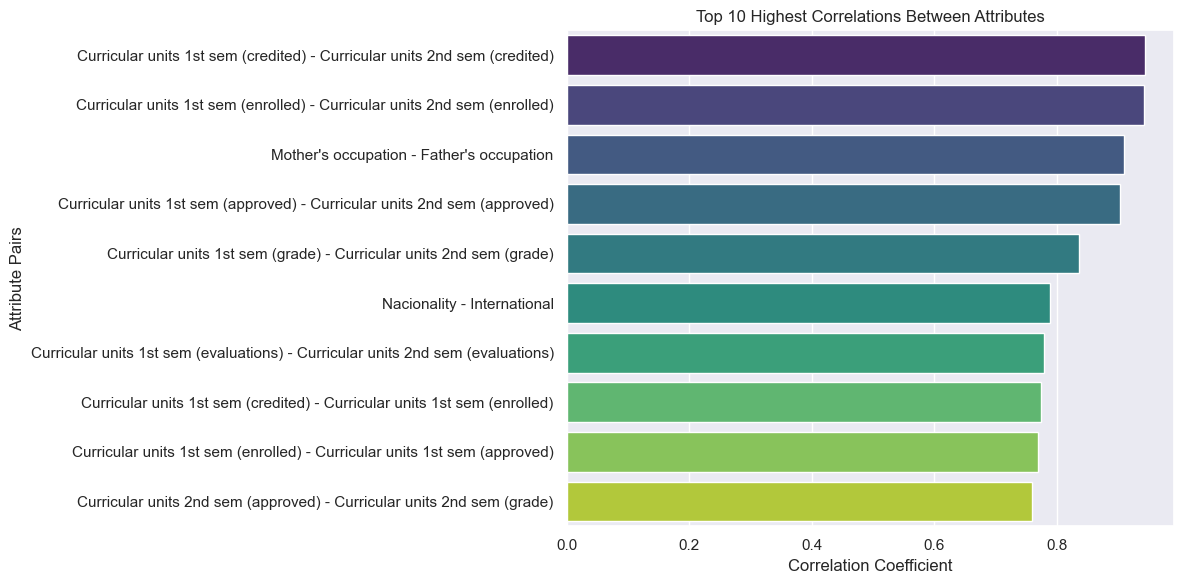

In [18]:
# Plot the Top 10 Correlations
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_10_unique_corr['Correlation'], 
    y=top_10_unique_corr.apply(lambda x: f"{x['Attribute 1']} - {x['Attribute 2']}", axis=1),
    palette="viridis", hue =top_10_unique_corr.apply(lambda x: f"{x['Attribute 1']} - {x['Attribute 2']}", axis=1)
)
plt.title("Top 10 Highest Correlations Between Attributes")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Attribute Pairs")
plt.tight_layout()
plt.show()

## HeatMap Collerration

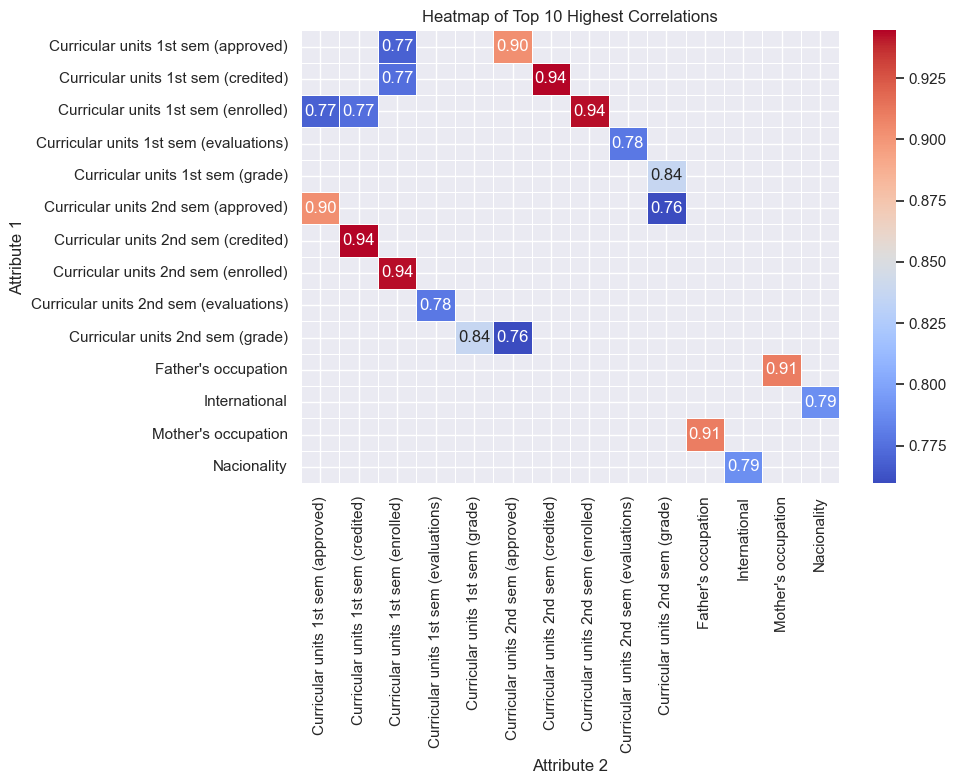

In [21]:
# Create a pivot table for the heatmap
heatmap_data = top_10_corr.pivot(index = "Attribute 1", columns="Attribute 2",values = "Correlation")

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Top 10 Highest Correlations")
plt.tight_layout()
plt.show()


### Curricular units 1st sem (credited)	Curricular units 2nd sem (credited)

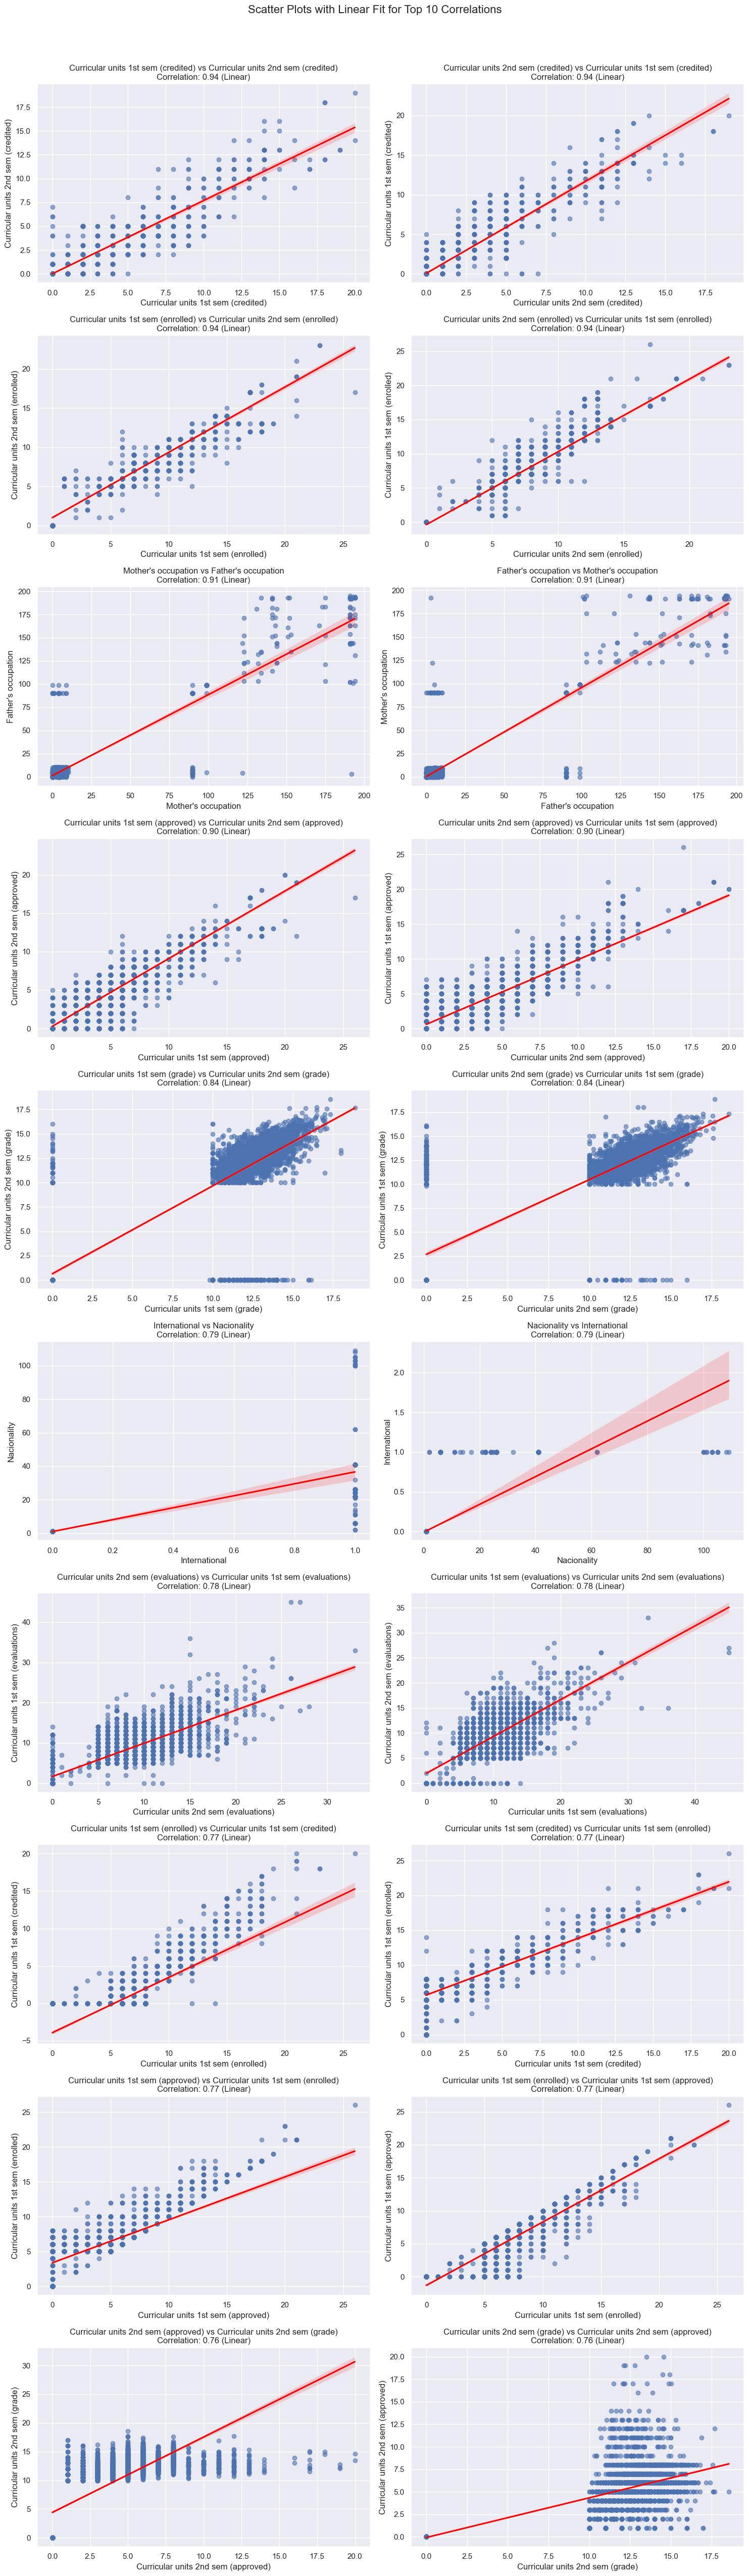

In [22]:
from scipy.stats import pearsonr

# Create scatter plots for the top 5 correlations with linear fit and linearity check
num_plots = len(top_10_corr)  # Number of correlations to plot
rows = (num_plots + 1) // 2  # Calculate rows needed for 2 columns

plt.figure(figsize=(15, rows * 5))  # Dynamically adjust the figure size

for i, row in enumerate(top_10_corr.itertuples(), 1):
    feature1 = row._1  # Feature 1
    feature2 = row._2  # Feature 2

    # Compute Pearson correlation coefficient
    correlation, _ = pearsonr(df2[feature1], df2[feature2])
    linearity = "Linear" if abs(correlation) > 0.7 else "Non-linear"

    # Create a subplot
    plt.subplot(rows, 2, i)
    sns.regplot(x=df2[feature1], y=df2[feature2], line_kws={'color': 'red'}, scatter_kws={'alpha': 0.6})
    plt.title(f'{feature1} vs {feature2}\nCorrelation: {correlation:.2f} ({linearity})')
    plt.xlabel(feature1)
    plt.ylabel(feature2)

plt.tight_layout()
plt.suptitle('Scatter Plots with Linear Fit for Top 10 Correlations', y=1.02, fontsize=16)
plt.show()

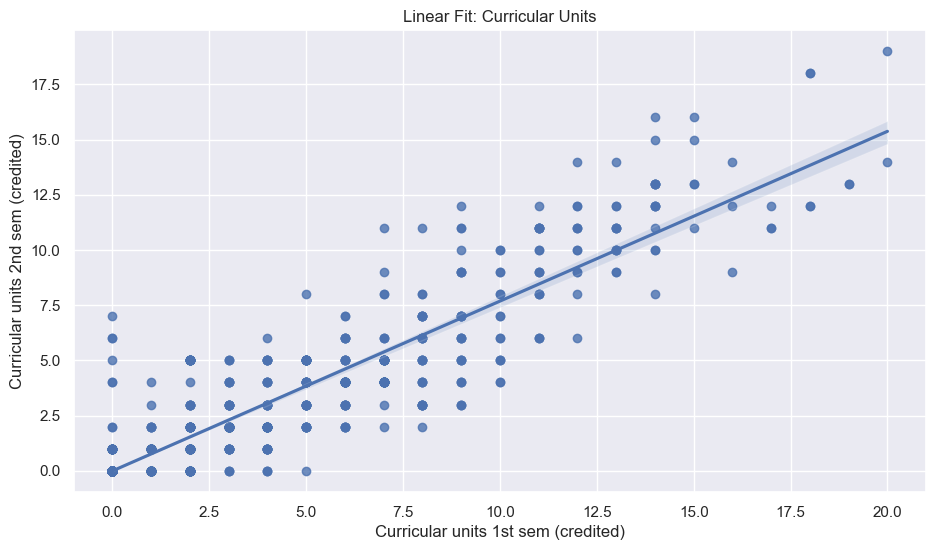

In [23]:
sns.regplot(x='Curricular units 1st sem (credited)', y='Curricular units 2nd sem (credited)', data=df2)
plt.title("Linear Fit: Curricular Units")
plt.show()


In [24]:
corr = df2[['Curricular units 1st sem (credited)', 'Curricular units 2nd sem (credited)']].corr()
corr

Curricular units 1st sem (credited)  \
Curricular units 1st sem (credited)                             1.000000   
Curricular units 2nd sem (credited)                             0.944527   

                                     Curricular units 2nd sem (credited)  
Curricular units 1st sem (credited)                             0.944527  
Curricular units 2nd sem (credited)                             1.000000

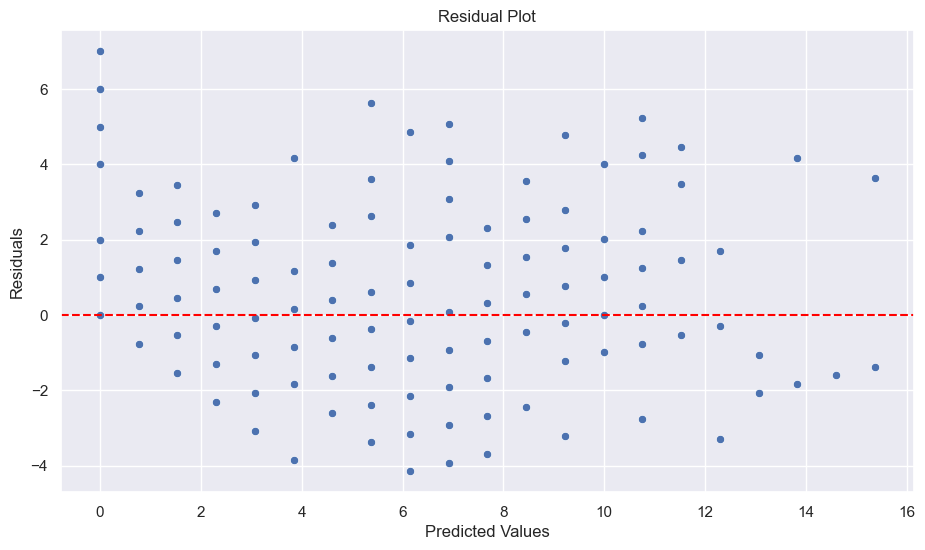

In [25]:
from sklearn.linear_model import LinearRegression

# Fit a simple linear regression
X = df2[['Curricular units 1st sem (credited)']].dropna()  # Example feature
y = df2['Curricular units 2nd sem (credited)'].dropna()
model = LinearRegression()
model.fit(X, y)

# Residual plot
predictions = model.predict(X)
residuals = y - predictions

sns.scatterplot(x=predictions, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

### Spliting data
* to avoid data leakage before balencing


In [26]:
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming 'data' is already loaded and contains the 'Target' column
X = df2.drop('Target', axis=1)
y = df2['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0, stratify=y)
# Step 2: Handle missing values
imputer = SimpleImputer(strategy='mean')  # Use 'median' or 'most_frequent' as needed
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Apply SMOTE for balancing
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create a balanced dataset
balanced_data = pd.concat([pd.DataFrame(X_balanced, columns=X.columns), pd.DataFrame(y_balanced, columns=['Target'])], axis=1)

# Save balanced data to a CSV file
balanced_output_path = 'Student_dataset_balanced.csv'
balanced_data.to_csv(balanced_output_path, index=False)
print(f"Balanced data saved to {balanced_output_path}")

Balanced data saved to Student_dataset_balanced.csv


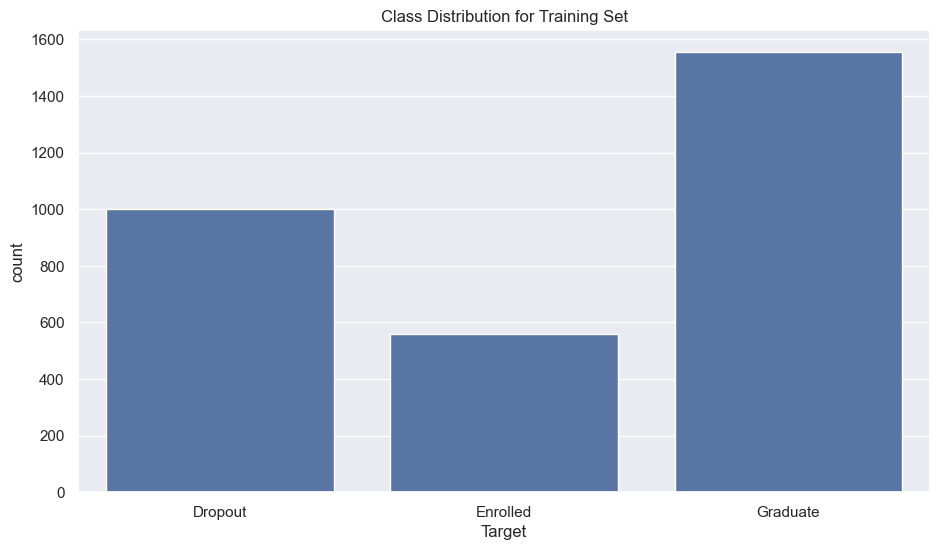

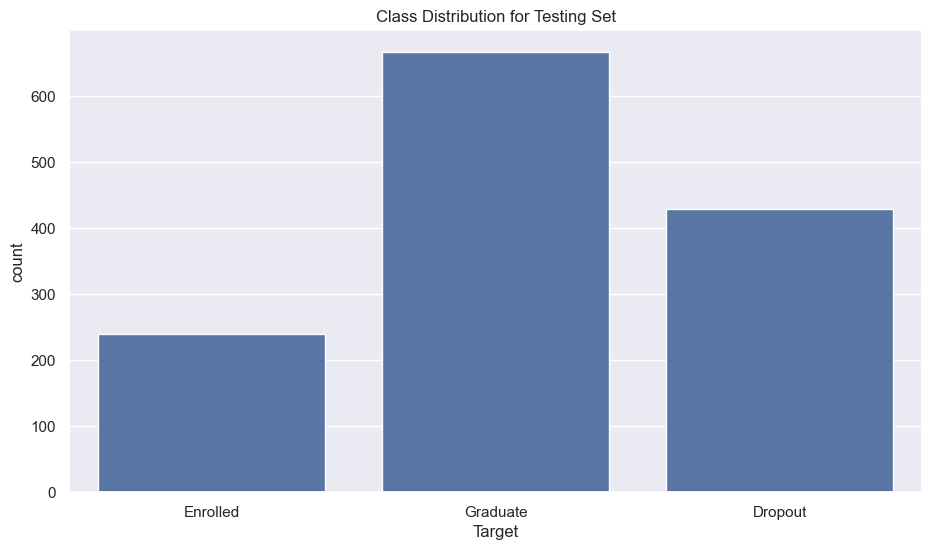

In [27]:
#visualize classes after splitting
plt.figure()
sns.countplot(x='Target', data = pd.DataFrame({'Target':y_train}))
plt.title('Class Distribution for Training Set')
plt.show()
plt.figure()
sns.countplot(x='Target', data = pd.DataFrame({'Target':y_test}))
plt.title('Class Distribution for Testing Set')
plt.show()

Right after we finish splitting, we can proceed to balance the training set using SMOTE.

For the current dataset, we have both numerical and categorical attributes. Therefore, we need to use SMOTENC, which requires the numerical data to be normalized, and also need to explicitly specify the index of the categorical columns. The following code extracts the indices of categorical columns and then normalizes the numerical values:

In [28]:
# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)


Categorical Columns: Index([], dtype='object')
Numerical Columns: Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       '

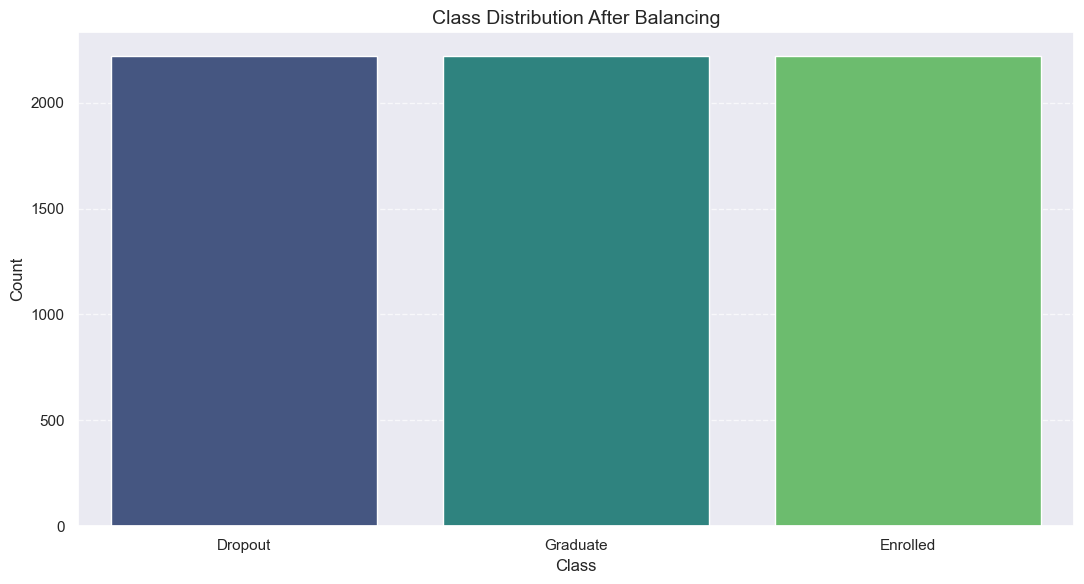

In [37]:
plt.figure()
sns.countplot(
    data=balanced_data, 
    x='Target', 
    hue='Target',  # Assign 'Target' to hue to match the palette
    palette='viridis',
    dodge=False,  # Ensures bars are not separated
    legend=False  # Removes the legend since it's redundant
)
plt.title('Class Distribution After Balancing', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Checking Training accuracy

### Checking Test accuracy

The average accurary of the model should be quite high. Now let's evaluate the model with the test data. Our set of test data was not normalized yet, so lets do that first then get the average accuracy using the `score` function:

In [49]:
# Create a DataFrame for coefficients
feature_names = X.columns  # Use original feature names
coefficients = logreg.coef_[0]  # Coefficients for binary classification

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Display feature importance
display(coef_df)


Feature  Coefficient
28             Curricular units 2nd sem (enrolled)     0.887028
27             Curricular units 2nd sem (credited)     0.339986
19                               Age at enrollment     0.299878
3                                           Course     0.231755
25                Curricular units 1st sem (grade)     0.176389
7                                      Nacionality     0.170961
15                                          Debtor     0.160368
33                               Unemployment rate     0.156549
8                           Mother's qualification     0.141104
11                             Father's occupation     0.137488
22             Curricular units 1st sem (enrolled)     0.111783
21             Curricular units 1st sem (credited)     0.104988
17                                          Gender     0.095404
13                                       Displaced     0.081392
2                                Application order     0.054214
35                                             GDP     0.043994
4                     Daytime/evening attendance\t     0.042280
1                                 Application mode     0.039691
34                                  Inflation rate     0.016447
6                   Previous qualification (grade)     0.013203
14                       Educational special needs    -0.008577
12                                 Admission grade    -0.033969
5                           Previous qualification    -0.042910
26  Curricular units 1st sem (without evaluations)    -0.067026
23          Curricular units 1st sem (evaluations)    -0.069177
9                           Father's qualification    -0.071588
32  Curricular units 2nd sem (without evaluations)    -0.075079
0                                   Marital status    -0.089815
29          Curricular units 2nd sem (evaluations)    -0.107808
18                              Scholarship holder    -0.113295
20                                   International    -0.248427
10                             Mother's occupation    -0.296984
31                Curricular units 2nd sem (grade)    -0.444635
16                         Tuition fees up to date    -0.521176
24             Curricular units 1st sem (approved)    -0.689933
30             Curricular units 2nd sem (approved)    -1.446772

In [50]:
# Convert X_train back to a DataFrame
X_train_preprocess = pd.DataFrame(X_train, columns=X.columns)

# Normalize numerical attributes using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
num_attributes = X_train_preprocess.select_dtypes(['int64', 'float64']).columns  # Identify numerical columns
X_train_preprocess[num_attributes] = min_max_scaler.fit_transform(X_train_preprocess[num_attributes])

# Display the preprocessed DataFrame
X_train_preprocess.head()


Marital status  Application mode  Application order    Course  \
2999             0.6          0.678571           0.111111  0.801466   
104              0.0          0.303571           0.111111  0.986142   
1880             0.2          0.767857           0.111111  0.912432   
4112             0.6          0.678571           0.111111  0.950693   
1045             0.0          0.107143           0.111111  1.000000   

      Daytime/evening attendance\t  Previous qualification  \
2999                           0.0                0.000000   
104                            1.0                0.000000   
1880                           1.0                0.904762   
4112                           1.0                0.000000   
1045                           0.0                0.928571   

      Previous qualification (grade)  Nacionality  Mother's qualification  \
2999                        0.452632          0.0                0.418605   
104                         0.294737          0.0                0.418605   
1880                        0.684211          0.0                0.837209   
4112                        0.473684          0.0                0.860465   
1045                        0.263158          0.0                0.000000   

      Father's qualification  ...  \
2999                0.418605  ...   
104                 0.418605  ...   
1880                0.837209  ...   
4112                0.837209  ...   
1045                0.418605  ...   

      Curricular units 1st sem (without evaluations)  \
2999                                             0.0   
104                                              0.0   
1880                                             0.0   
4112                                             0.0   
1045                                             0.0   

      Curricular units 2nd sem (credited)  \
2999                               0.0000   
104                                0.0000   
1880                               0.0625   
4112                               0.0000   
1045                               0.0000   

      Curricular units 2nd sem (enrolled)  \
2999                             0.238095   
104                              0.285714   
1880                             0.285714   
4112                             0.380952   
1045                             0.238095   

      Curricular units 2nd sem (evaluations)  \
2999                                0.303030   
104                                 0.000000   
1880                                0.484848   
4112                                0.333333   
1045                                0.181818   

      Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
2999                             0.000000                          0.000000   
104                              0.000000                          0.000000   
1880                             0.315789                          0.788112   
4112                             0.368421                          0.654769   
1045                             0.000000                          0.000000   

      Curricular units 2nd sem (without evaluations)  Unemployment rate  \
2999                                             0.0           0.372093   
104                                              0.0           0.406977   
1880                                             0.0           0.558140   
4112                                             0.0           0.372093   
1045                                             0.0           0.558140   

      Inflation rate       GDP  
2999        0.488889  0.766182  
104         0.311111  0.803170  
1880        0.288889  0.772787  
4112        0.488889  0.766182  
1045        0.288889  0.772787  

[5 rows x 36 columns]

---
# Classification

Up until this point we current have a balanced training dataset, and a testing set for evaluation. In this section, we will train various classifiers, evaluate and compare the results. Most traditional classifiers are available in the scikit-learn package, but there are also alternatives available from other packages like Statsmodel, etc. Depending on the type of classifiers selected, additionally preprocessing might be needed to convert the attributes into the required type.

### Logistic Rigression

In [53]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Check performance on the training set
print('Training accuracy: ', logreg.score(X_train_scaled, y_train))


Training accuracy:  0.7760282776349614


### Testing Accurancy

In [55]:
print('Testing accuracy: ', logreg.score(X_test_scaled, y_test) )

Testing accuracy:  0.7556221889055472


### Confussion Matrix

Logistic Regression Performance:
              precision    recall  f1-score   support

     Dropout       0.76      0.66      0.71       428
    Enrolled       0.60      0.11      0.18       240
    Graduate       0.67      0.93      0.78       666

    accuracy                           0.69      1334
   macro avg       0.68      0.56      0.56      1334
weighted avg       0.69      0.69      0.65      1334

Accuracy: 0.6934032983508246


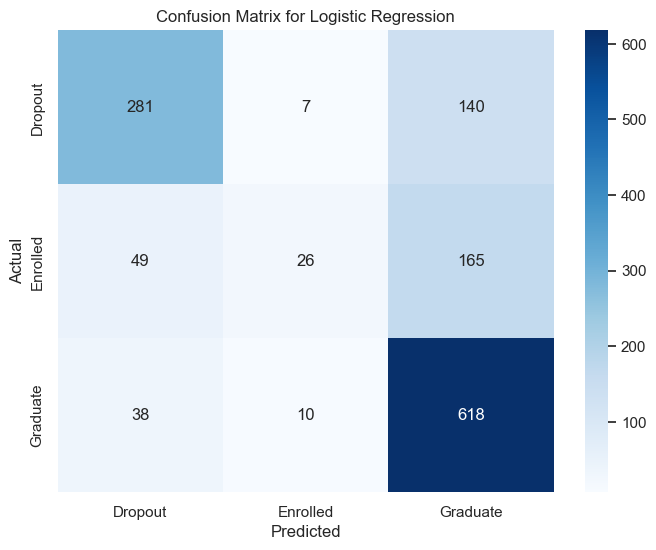

In [56]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Evaluate the model
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [67]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

# Check if it's binary classification (2x2 matrix)
if conf_mat.shape == (2, 2):
    tn, fp, fn, tp = conf_mat.ravel()
    print('True positive: ', tp)
    print('True negatives: ', tn)
    print('False positive: ', fp)
    print('False negatives: ', fn)
else:
    # Multi-class classification
    print("Multi-class confusion matrix, cannot unpack directly.")
    for i in range(conf_mat.shape[0]):
        print(f"Metrics for Class {i}:")
        tp = conf_mat[i, i]
        fn = conf_mat[i, :].sum() - tp
        fp = conf_mat[:, i].sum() - tp
        tn = conf_mat.sum() - (tp + fn + fp)
        print(f"  True Positives: {tp}")
        print(f"  True Negatives: {tn}")
        print(f"  False Positives: {fp}")
        print(f"  False Negatives: {fn}")


[[281   7 140]
 [ 49  26 165]
 [ 38  10 618]]
Multi-class confusion matrix, cannot unpack directly.
Metrics for Class 0:
  True Positives: 281
  True Negatives: 819
  False Positives: 87
  False Negatives: 147
Metrics for Class 1:
  True Positives: 26
  True Negatives: 1077
  False Positives: 17
  False Negatives: 214
Metrics for Class 2:
  True Positives: 618
  True Negatives: 363
  False Positives: 305
  False Negatives: 48


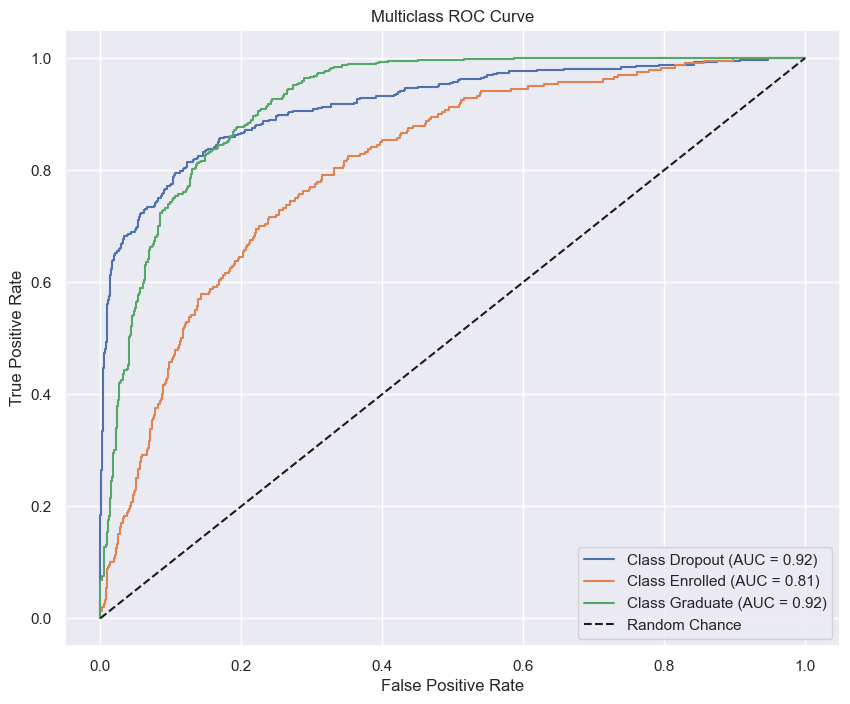

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the target variable for multiclass ROC
classes = logreg.classes_
y_test_binarized = label_binarize(y_test, classes=classes)
y_proba = logreg.predict_proba(X_test_scaled)  # Get prediction probabilities

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
    roc_auc = roc_auc_score(y_test_binarized[:, i], y_proba[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {roc_auc:.2f})")

# Plot diagonal line for random chance
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="best")
plt.show()


---
## K-Nearest Neighbors

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [84]:
#Testing time may take long
print('Training accuracy: ', knn.score(X_train_scaled,y_train))
print('Testing accuracy: ', knn.score(X_test_scaled, y_test))

Training accuracy:  0.7863110539845758
Testing accuracy:  0.6754122938530734


In [85]:
knn_pred = knn.predict(X_test_scaled)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

     Dropout       0.74      0.66      0.70       428
    Enrolled       0.36      0.26      0.30       240
    Graduate       0.71      0.84      0.77       666

    accuracy                           0.68      1334
   macro avg       0.61      0.59      0.59      1334
weighted avg       0.66      0.68      0.66      1334



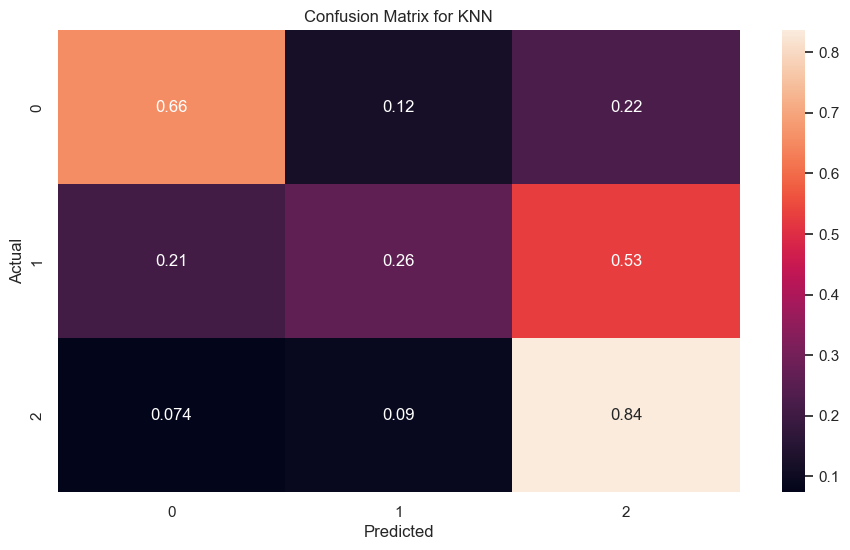

In [86]:
knn_conf_mat = confusion_matrix(y_test, knn_pred,normalize='true')
sns.heatmap(knn_conf_mat, annot=True)
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [87]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for K
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# GridSearchCV to find the best K
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

# Evaluate the best model
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)
print("\nClassification Report for Best KNN:")
print(classification_report(y_test, y_pred_best))


Best Parameters: {'n_neighbors': 11}
Best Cross-Validated Accuracy: 0.7021238380825071

Classification Report for Best KNN:
              precision    recall  f1-score   support

     Dropout       0.82      0.64      0.72       428
    Enrolled       0.43      0.20      0.27       240
    Graduate       0.69      0.92      0.79       666

    accuracy                           0.70      1334
   macro avg       0.65      0.59      0.59      1334
weighted avg       0.68      0.70      0.67      1334

